In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

In [2]:
plates = 'RBP201202A147|RBP201202A134|RBP201202A135|RBP201202A136|RBP201202A054|RBP201202A053|RBP201202A052|RBP201202A051'

triplicate = pd.read_pickle('/ghds/groups/labdesk/bshih/c19dash/c19_dashboard/c19_call.pickle').query("runid == '210122_NB552482_0010_AHNY33BGXG'").dropna(axis=1, how='all')
triplicate = triplicate[triplicate.pos_tube_rack.str.contains(plates, na=False)]

In [3]:
fast = 'RBP201202A147|RBP201202A134|RBP201202A135|RBP201202A136'
RBP1 = 'RBP201202A147|RBP201202A135|RBP201202A054|RBP201202A052'
nasal = 'RBP201202A147|RBP201202A134|RBP201202A054|RBP201202A053'

map1 = {'A':0, 'B':0,
        'C':125, 'D':125,
        'E':125, 'F':12.5,
        'G':12.5, 'H':12.5}

map2 = {'A':0, 'B':0,
        'C':50, 'D':50,
        'E':50, 'F':25,
        'G':25, 'H':25}

In [4]:
triplicate.loc[triplicate.pos_tube_rack.str.contains(fast), 'extraction'] = 'fast'
triplicate.loc[~triplicate.pos_tube_rack.str.contains(fast), 'extraction'] = 'norm'

triplicate.loc[triplicate.pos_tube_rack.str.contains(nasal), 'background'] = 'nasal'
triplicate.loc[~triplicate.pos_tube_rack.str.contains(nasal), 'background'] = 'saliva'

triplicate.loc[triplicate.pos_tube_rack.str.contains(RBP1), 'copies'] = triplicate.pos_tube_rack.map(lambda x: x.split(':')[1][0]).map(map1)
triplicate.loc[~triplicate.pos_tube_rack.str.contains(RBP1), 'copies'] = triplicate.pos_tube_rack.map(lambda x: x.split(':')[1][0]).map(map2)

In [5]:
pos_ctrl = triplicate[triplicate['run_sample_id'].str.contains(r'^POS.*')]
no_ctrl = triplicate[triplicate['run_sample_id'].str.contains(r'^\d{10}')]

y = pd.get_dummies(no_ctrl.call)

a = pd.concat([no_ctrl, y], axis=1).groupby(['extraction', 'background', 'copies']).agg({'detected':'sum',
                                                                                     'not_detected':'sum'})
a.loc[:,'total'] = a['detected'] + a['not_detected']
a.loc[:,'percent_detect'] = ((a['detected']/a['total'])*100).round(2)
a

detected  not_detected  total  percent_detect
extraction background copies                                               
fast       nasal      0.0            1            43     44            2.27
                      12.5          12            24     36           33.33
                      25.0          26            10     36           72.22
                      50.0          34             2     36           94.44
                      125.0         36             0     36          100.00
           saliva     0.0            0            44     44            0.00
                      12.5          26            10     36           72.22
                      25.0          34             2     36           94.44
                      50.0          36             0     36          100.00
                      125.0         36             0     36          100.00
norm       nasal      0.0            0            44     44            0.00
                      12.5          23            13     36           63.89
                      25.0          36             0     36          100.00
                      50.0          36             0     36          100.00
                      125.0         36             0     36          100.00
           saliva     0.0            1            43     44            2.27
                      12.5          28             8     36           77.78
                      25.0          34             2     36           94.44
                      50.0          36             0     36          100.00
                      125.0         36             0     36          100.00

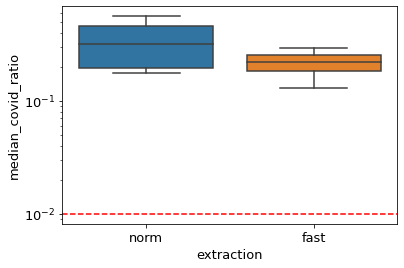

In [6]:
plt.rcParams['font.size'] = '13'

ax = sns.boxplot(x='extraction', 
                 y='median_covid_ratio', 
                 data=pos_ctrl, 
                 showfliers=False
                 )

ax.set_yscale('log')
ax.axhline(linewidth=1.5, color='r', ls='--', y=0.01)
plt.title('')

plt.show()

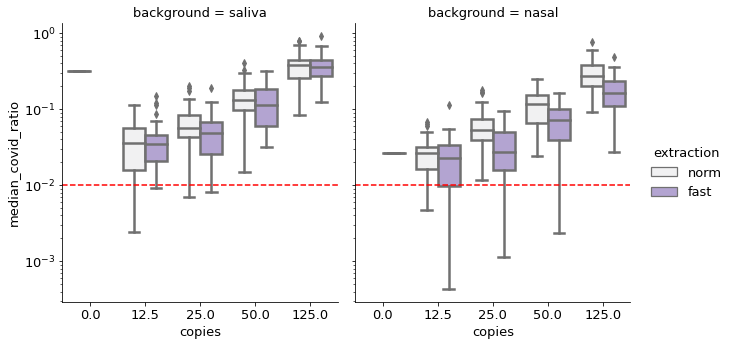

In [7]:
g = sns.catplot(y="median_covid_ratio", x="copies", col="background",
                kind="box", orient="v", height=5, aspect=0.9,
                data=no_ctrl.query("median_covid_ratio != 0"), hue='extraction', 
                showfliers=True, color='#b19cd9', linewidth=2.5)
g.tight_layout()
g.set(yscale="log")
[i.axhline(linewidth=1.5, color='r', ls='--', y=0.01) for i in g.axes[0]]
plt.show()